In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#mid-cities has been removed because of its missing population data and insignificancy

#one-year cumulative visitors for all sites
cum_visitors = pd.read_excel('cumulative per month.xls',index_col=0)
#cumulative visitors for 18 experiment sites starting from Sept 2017
cum_since_2017 = pd.read_excel('cumulative for 18.xls', index_col=0)

In [3]:
cum_visitors.head()

,Rochester,Albany,Fairfield County,Buffalo,Houston,Salt Lake,Ann Arbor/Detroit,St. Louis,Westchester,Hudson Valley,...,Kansas City,Memphis,Milwaukee,Long Island,Philadelphia,Pittsburgh,Providence,Tampa,Toronto,Vancouver
Total,1000000,2000000,1000000,1500000,5600000.0,1000000.0,4200000.0,3000000.0,1300000.0,800000.0,...,2100000.0,1300000.0,1600000.0,1400000.0,6000000.0,2400000.0,1600000.0,3000000.0,6400000.0,2500000.0
Jan 2012,239036,30578,26776,5009,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Feb 2012,246455,33235,28354,5457,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
March 2012,254733,36386,30184,5950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
April 2012,263758,39000,32366,6641,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# get the data for atlanta, phoenix and MSP, and fill in the NAN value by zero
oldsites = cum_visitors[['Atlanta', 'Phoenix', 'MSP']].drop(cum_visitors.loc['Jan 2012': 'Oct 2015'].index).fillna(value=0)

In [5]:
#get rid of Rochester and St Louis, only the 18 advertising sites are left
newsites = cum_since_2017.drop(labels = ['Rochester', 'St. Louis'], axis=1)

In [6]:
#zero filled dataframe in order for concat
fillin = pd.DataFrame(0, index=oldsites.loc['Nov 2015': 'Aug 2017'].index, columns=newsites.columns)

In [7]:
end_point = 'Total'
start_point = 'Sep 2017'
newsites_2015 = pd.concat([newsites.loc[:end_point], fillin, newsites.loc[start_point:]])

In [8]:
#all sites include advertising sites and atlanta, phoenix, and MSP
allsites = pd.concat([oldsites, newsites_2015], axis=1, sort=False)

In [9]:
allsites_norm = pd.DataFrame(columns=allsites.columns)

In [10]:
#divided each cell to the city's total population
for site in allsites.columns:
    allsites_norm[site] = allsites[site]/allsites[site][0]

In [11]:
allsites_norm = allsites_norm.drop('Total')

In [12]:
allsites_norm.head()

,Atlanta,Phoenix,MSP,Research Triangle,Charlotte,DMV,Dallas,Ft Worth,Indianapolis,Jacksonville,Kansas City,Memphis,Milwaukee,Long Island,Philadelphia,Pittsburgh,Providence,Tampa,Toronto,Vancouver
Nov 2015,0.000000,0.0,0.000030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dec 2015,0.000000,0.0,0.000048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jan 2016,0.000011,0.0,0.000053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Feb 2016,0.000013,0.0,0.000065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mar 2016,0.000013,0.0,0.000078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

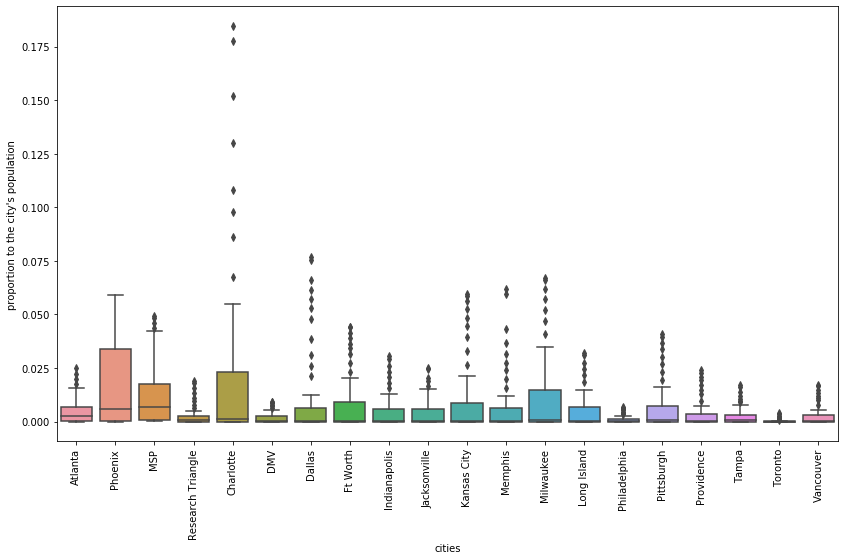

In [13]:
#slide 13 of ppt
fig, ax = plt.subplots(figsize=(14,8))
sns.boxplot(data=allsites_norm)
plt.xlabel('cities')
plt.ylabel("proportion to the city's population")
plt.xticks(rotation=90)
#we can see that charlotte is an outlier in this case

In [14]:
#remove charlotte because it is an outlier
allsites_norm = allsites_norm.drop('Charlotte',axis=1)

In [15]:
allsites_max = allsites_norm.max().max()
allsites_min = allsites_norm.min().min()

In [16]:
#min-max normalization, convert all data to a number between 0-1
allsites_final=((allsites_norm-allsites_min)/(allsites_max-allsites_min))

In [17]:
#ready to plot
no_ads = ['Atlanta', 'Phoenix', 'MSP']
#no_ads = ['Atlanta', 'Phoenix']
ads_2019 = ['Research Triangle','Dallas','Kansas City','Memphis','Philadelphia','Providence','Tampa','Toronto']
ads_2018 = ['DMV','Ft Worth', 'Indianapolis','Jacksonville','Milwaukee','Long Island','Pittsburgh', 'Vancouver']

sites_no_ads = allsites_final[no_ads]
sites_avg = sites_no_ads.mean(axis=1)

sites_2018_ads = allsites_final[ads_2018]
sites_2018_avg = sites_2018_ads.mean(axis=1)

sites_2019_ads = allsites_final[ads_2019]
sites_2019_avg = sites_2019_ads.mean(axis=1)

In [18]:
sites_avg = sites_avg['Nov 2016':]
sites_2018_avg = sites_2018_avg['Sep 2017':]
sites_2019_avg = sites_2019_avg['Sep 2017':]

Text(0.5, 0, '# of months after launching')

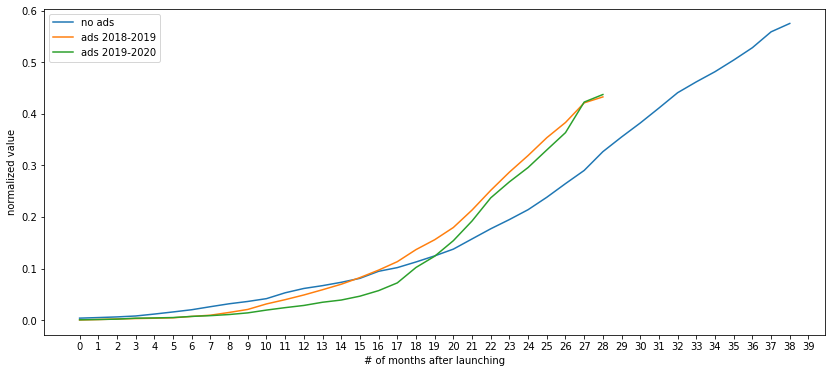

In [33]:
#slide 14 in ppt
fig, ax = plt.subplots(figsize=(14,6))
sites_avg.plot(label='no ads')
sites_2018_avg.plot(label='ads 2018-2019')
sites_2019_avg.plot(label='ads 2019-2020')
plt.legend()
plt.ylabel('normalized value')
plt.xticks(range(0,40), labels=range(0,40))
plt.xlabel('# of months after launching')

In [35]:
sites_2018_copy = pd.DataFrame(sites_2018_avg)
sites_2019_copy = pd.DataFrame(sites_2019_avg)
sites_avg_copy = pd.DataFrame(sites_avg)

In [36]:
#export to excel, further analysis by tableau (slide 15 in ppt)
sites_2018_copy.to_excel('2018 ads for Tableau.xlsx')
sites_2019_copy.to_excel('2019 ads for Tableau.xlsx')
#checkpoint

In [37]:
#Part 2
#exploring Facebook clicks vs Months
fb_users = pd.read_excel('uniq from facebook.xls', index_col=0)
fb_users = fb_users.transpose()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

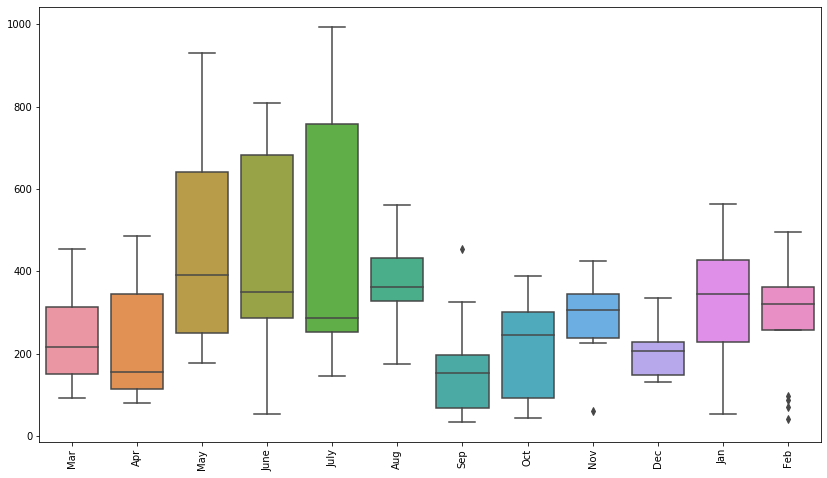

In [38]:
#slide 18 in ppt
fig, ax = plt.subplots(figsize=(14,8))
sns.boxplot(data=fb_users)
plt.xticks(rotation=90)

In [39]:
# reshape the fb_user dataframe suitable for statsmodels package
fb_anova = pd.melt(fb_users.reset_index(), id_vars=['index'], value_vars=['Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
       'Jan', 'Feb'])
# replace column names
fb_anova.columns = ['site', 'months', 'visitors']

In [40]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [54]:
#ANOVA analysis, slide 19 in ppt
model = ols('visitors ~ C(months)', data=fb_anova).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                 sum_sq     df         F        PR(>F)
C(months)  2.477508e+06   11.0  8.115895  1.375404e-11
Residual   5.328282e+06  192.0       NaN           NaN


In [42]:
# The p-value obtained from ANOVA analysis is significant(p_value < 0.05), so we can conclude that there are significant differences 
# among months.

In [43]:
# To know the pairs of significant different months, we can perform multiple pairwise comparison (Post-hoc comparison) analysis 
# using Tukey HSD test
m_comp = pairwise_tukeyhsd(endog=fb_anova['visitors'], groups=fb_anova['months'], alpha=0.05)
print(m_comp)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
   Apr    Aug  137.5882 0.4094  -51.4792  326.6557  False
   Apr    Dec  -26.3529    0.9 -215.4204  162.7145  False
   Apr    Feb   56.4706    0.9 -132.5969   245.538  False
   Apr    Jan   98.4706 0.8388  -90.5969   287.538  False
   Apr   July  270.9412  0.001   81.8737  460.0086   True
   Apr   June  226.4706 0.0057   37.4031   415.538   True
   Apr    Mar    6.5882    0.9 -182.4792  195.6557  False
   Apr    May  251.8824  0.001   62.8149  440.9498   True
   Apr    Nov   66.7059    0.9 -122.3616  255.7733  False
   Apr    Oct  -16.5294    0.9 -205.5969   172.538  False
   Apr    Sep  -67.1176    0.9 -256.1851  121.9498  False
   Aug    Dec -163.9412 0.1609 -353.0086   25.1263  False
   Aug    Feb  -81.1176    0.9 -270.1851  107.9498  False
   Aug    Jan  -39.1176    0.9 -228.1851  149.9498  False
   Aug   July 

In [ ]:
plt.ax.tick_params(labelsize=8)

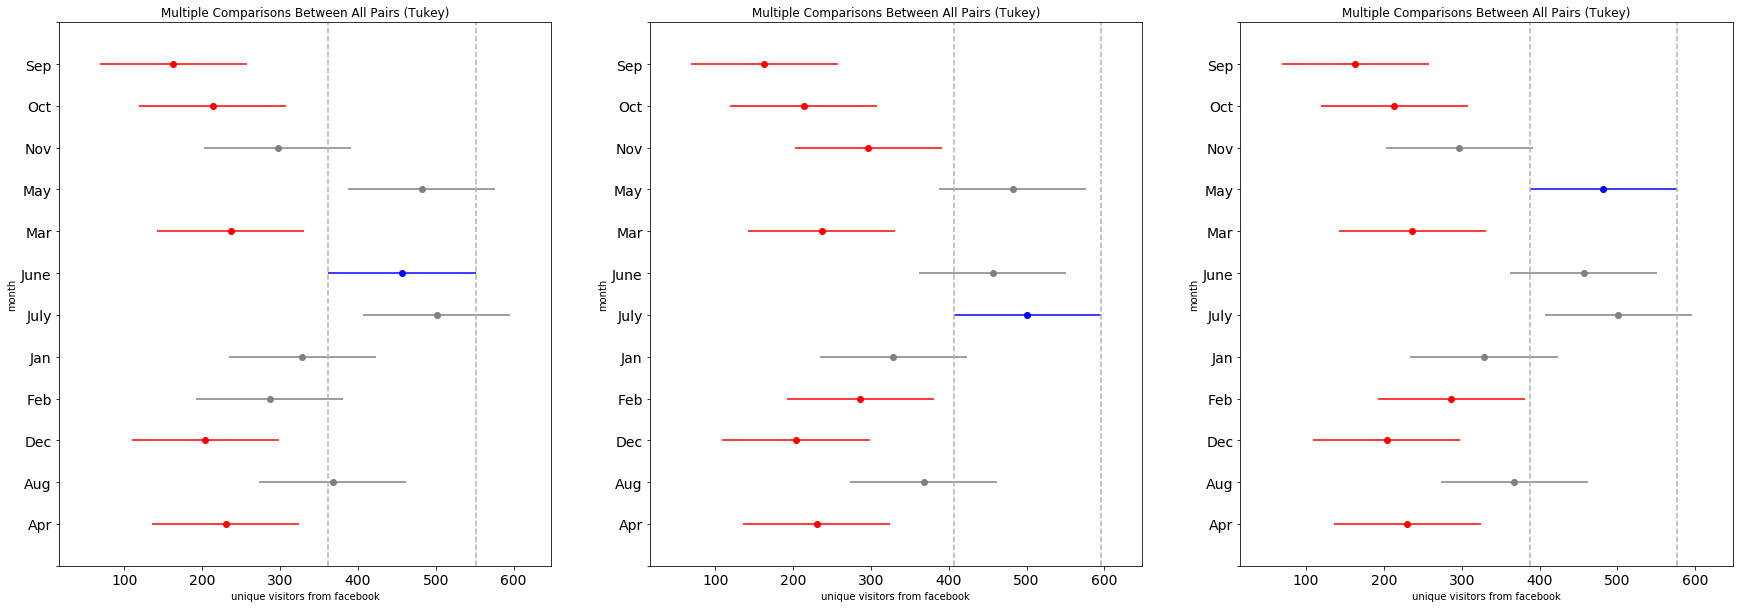

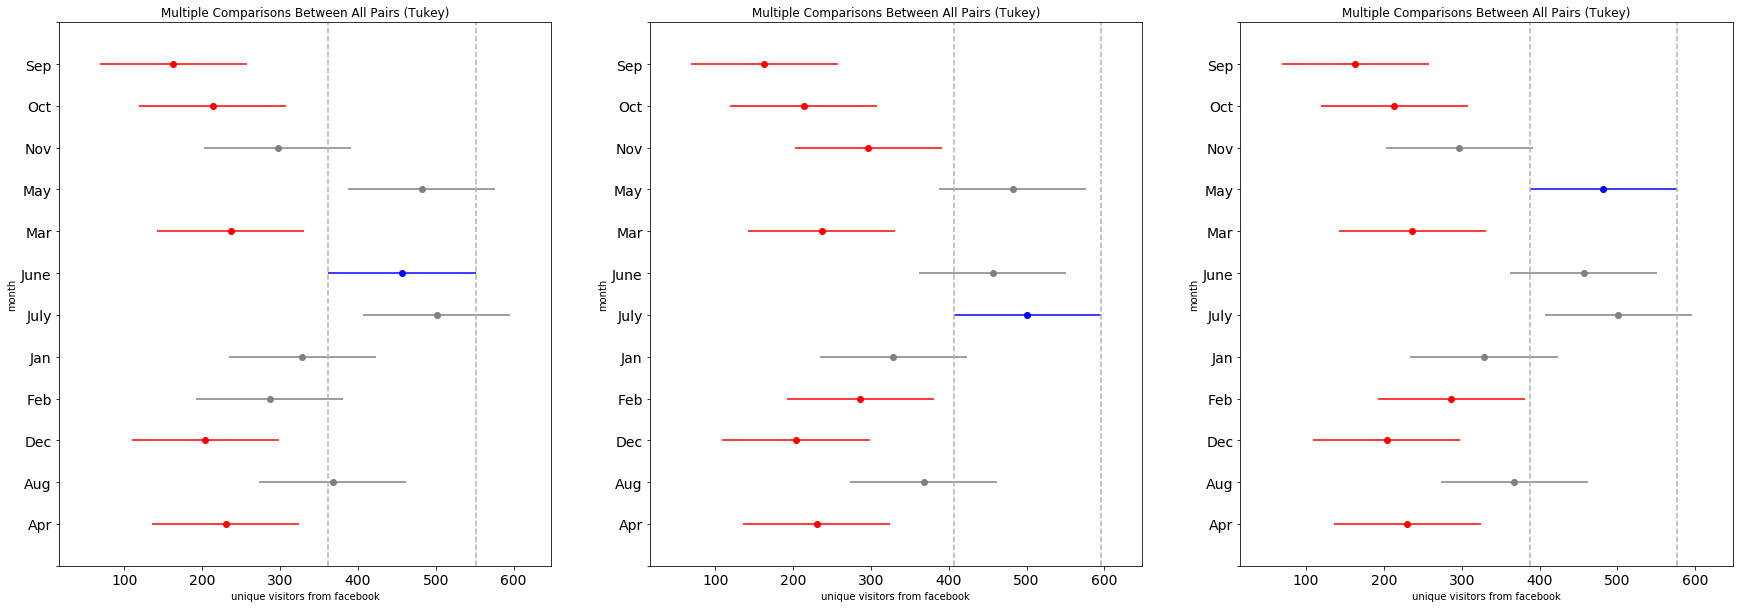

In [52]:
#three highest months, slide 20 in ppt
fig = plt.figure(figsize=(30,10))
size = (30, 10)

axes1 = fig.add_subplot(131)
axes1.tick_params(labelsize=14)
axes2 = fig.add_subplot(132)
axes2.tick_params(labelsize=14)
axes3 = fig.add_subplot(133)
axes3.tick_params(labelsize=14)

m_comp.plot_simultaneous(comparison_name='June', ax=axes1, xlabel='unique visitors from facebook', ylabel='month', figsize=size)
m_comp.plot_simultaneous(comparison_name='July', ax=axes2, xlabel='unique visitors from facebook', ylabel='month', figsize=size)
m_comp.plot_simultaneous(comparison_name='May', ax=axes3, xlabel='unique visitors from facebook', ylabel='month', figsize=size)
#where the summer vacation at

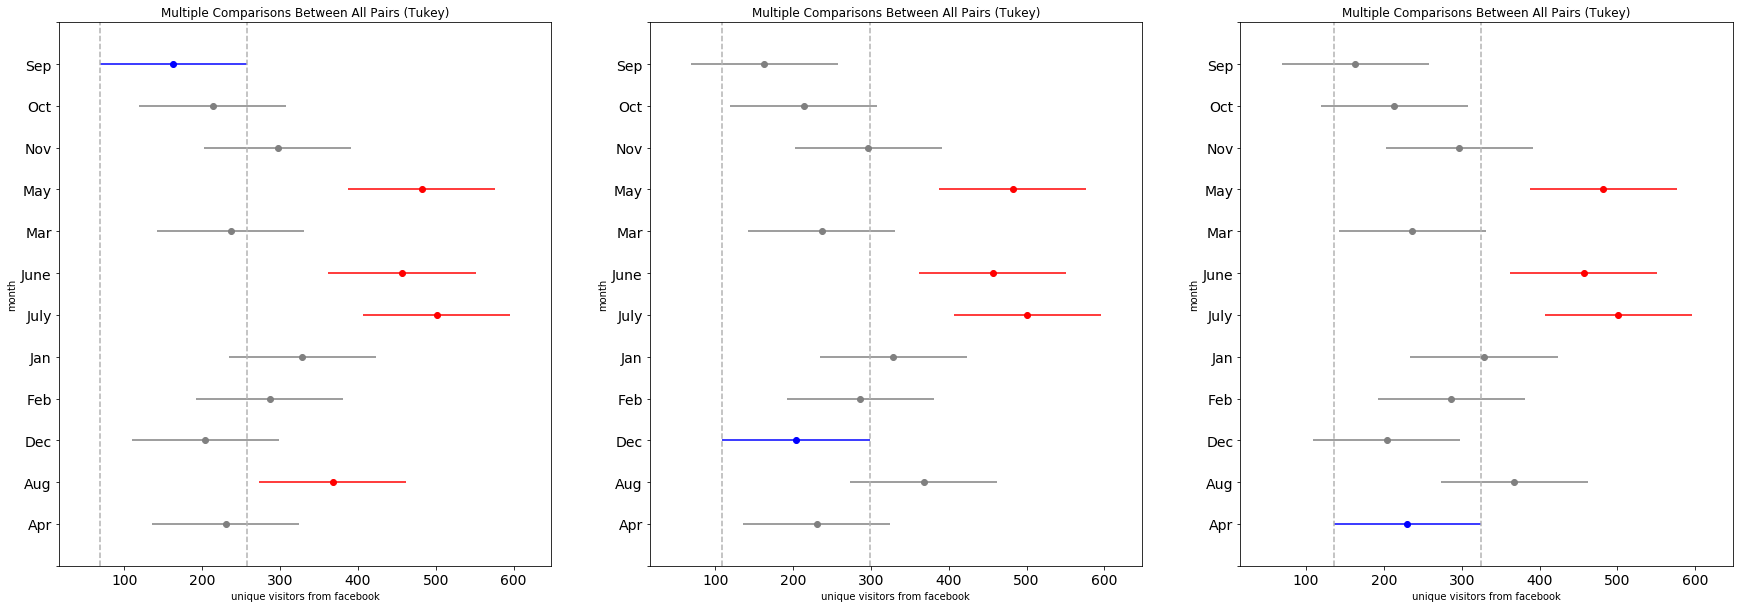

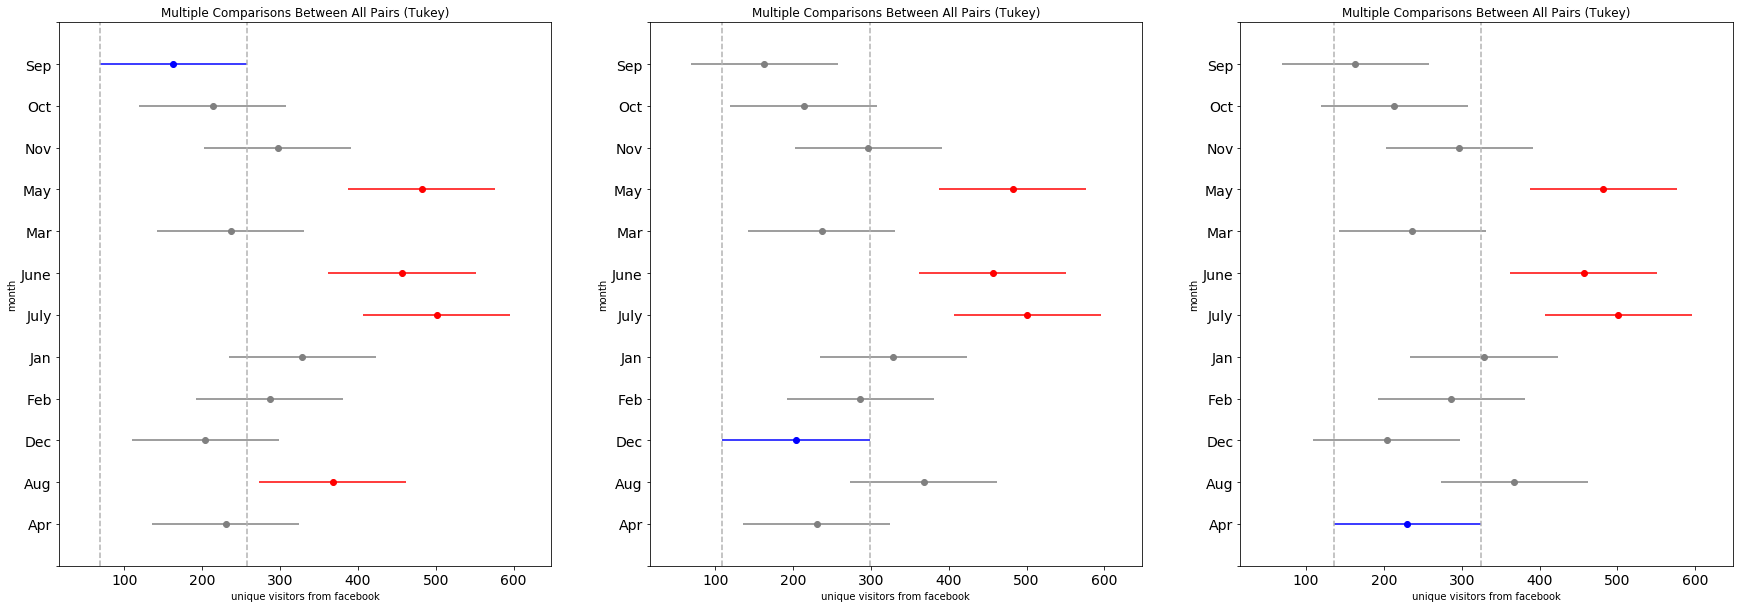

In [53]:
#three lowest months, slide 21 in ppt
fig = plt.figure(figsize=(30,10))
size = (30, 10)

axes1 = fig.add_subplot(131)
axes1.tick_params(labelsize=14)
axes2 = fig.add_subplot(132)
axes2.tick_params(labelsize=14)
axes3 = fig.add_subplot(133)
axes3.tick_params(labelsize=14)

m_comp.plot_simultaneous(comparison_name='Sep', ax=axes1, xlabel='unique visitors from facebook', ylabel='month',figsize=size)
m_comp.plot_simultaneous(comparison_name='Dec', ax=axes2, xlabel='unique visitors from facebook', ylabel='month',figsize=size)
m_comp.plot_simultaneous(comparison_name='Apr', ax=axes3, xlabel='unique visitors from facebook', ylabel='month',figsize=size)
#Dec is Christmas, Apr is final, and Sept semester begins

In [69]:
#Part 3
#Estimate the number standing for maturity
cum_norm = pd.DataFrame(columns = cum_visitors.columns)
for site in cum_norm.columns:
    cum_norm[site] = cum_visitors[site]/cum_visitors[site][0]
cum_norm = cum_norm.drop('Total').fillna(value=0)

In [70]:
#St. Louis, Albany, Buffalo, Fairfield County, Houston, Westchester are the most typical matured sites,most of them start in 2011-2013. 

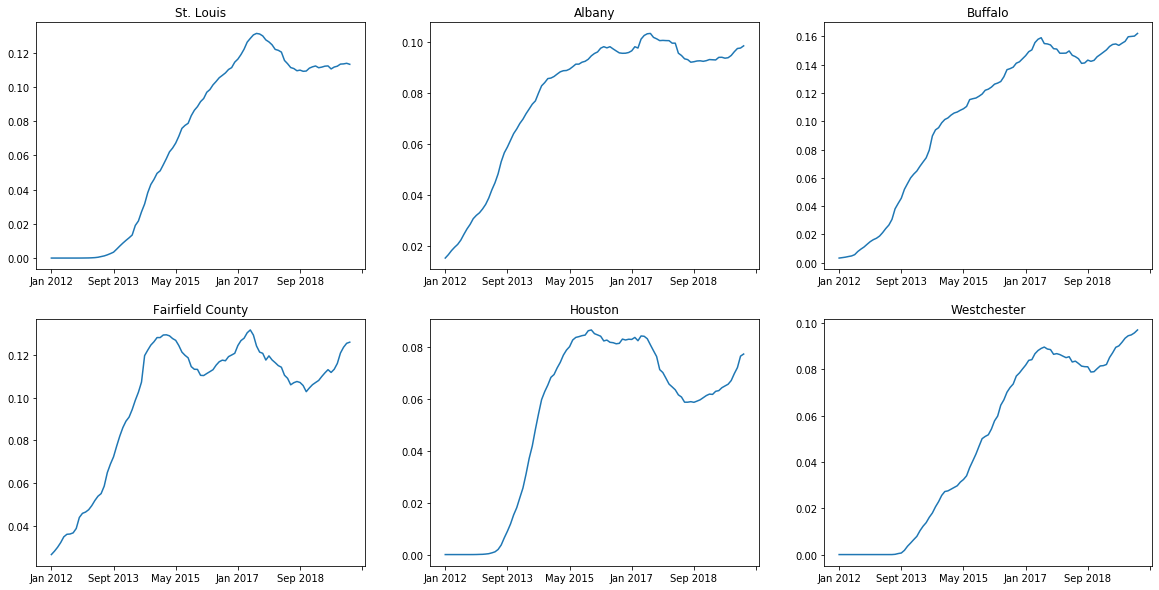

In [71]:
#slide 25 in ppt
fig = plt.figure(figsize=(20,10))

axes1 = fig.add_subplot(231)
axes2 = fig.add_subplot(232)
axes3 = fig.add_subplot(233)
axes4 = fig.add_subplot(234)
axes5 = fig.add_subplot(235)
axes6 = fig.add_subplot(236)

axes = [axes1,axes2,axes3,axes4,axes5,axes6]
matured = ['St. Louis', 'Albany', 'Buffalo', 'Fairfield County', 'Houston', 'Westchester']

for i in range(6):
    cum_norm[matured[i]].plot(ax=axes[i], title=matured[i])

#buffalo is higher because it's near Rochester, so the vicinity provides more traffic

In [72]:
#The maximum percentage of one-year cumulative visitors to the total population
#slide 26 in ppt
for i in range(6):
    site_max = max(cum_norm[matured[i]])
    print(matured[i], round(site_max, 3))

St. Louis 0.131
Albany 0.103
Buffalo 0.162
Fairfield County 0.132
Houston 0.087
Westchester 0.097


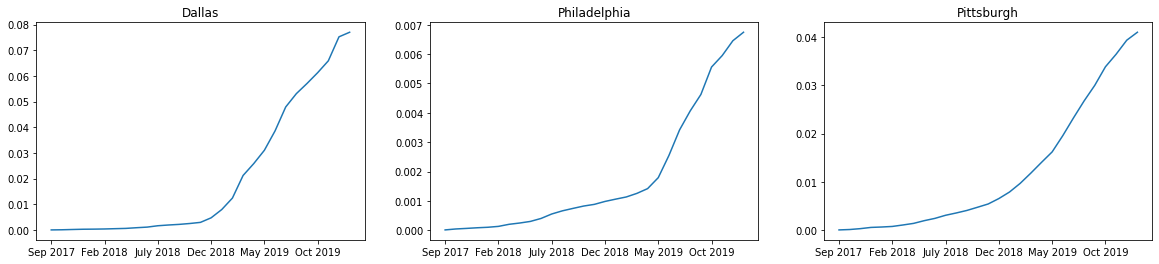

In [73]:
#Compared to sites that are still growing, MSP, Atlanta, Phoenix
#slide 27 in ppt
fig = plt.figure(figsize=(20,4))

axes1 = fig.add_subplot(131)
axes2 = fig.add_subplot(132)
axes3 = fig.add_subplot(133)

axes_ = [axes1, axes2, axes3]
growing = ['Dallas', 'Philadelphia', 'Pittsburgh']

for i in range(3):
    allsites_norm[growing[i]]['Sep 2017':].plot(ax=axes_[i], title=growing[i])

In [ ]:
#Our advertising sites are still in their fast growing phase, and they are far away from the maturity number that we estimate, 
#which means we can still use Facebook advertising to accelerate their growth.